## The Sinusoidal model

Written by: Randall Ali (r.ali@surrey.ac.uk)


Firstly let us import several of the packages we will need. If these packages are not available on your machine, you will have to install them first. 

In [ ]:
%pip install ipympl
import numpy as np 
from matplotlib.ticker import FormatStrFormatter
from matplotlib import pyplot as plt
import ipywidgets as widgets # interactive plots
import IPython
from IPython.display import Audio, display
%matplotlib widget

### The sinusoidal model

We recall the sinusoidal model as follows:

$\begin{equation}
y(t) = A\cos(2 \pi f_{o}t +\theta)
\end{equation}$

where $A$ is the amplitude, $f_{o}$ is the fundamental frequency (Hz), $t$ is the time (seconds), and $\theta$ is a phase offset (radians). This is one of the most fundamental and useful models in audio signal processing and is the building block of many other types of sounds. Let's have a look at how the parameters affect the look and sound of this signal!


Move the slider to see how the parameters change the cosine and listen to the result


interactive(children=(FloatSlider(value=1.0, description='A', max=1.0, min=0.1, step=0.01), IntSlider(value=10…

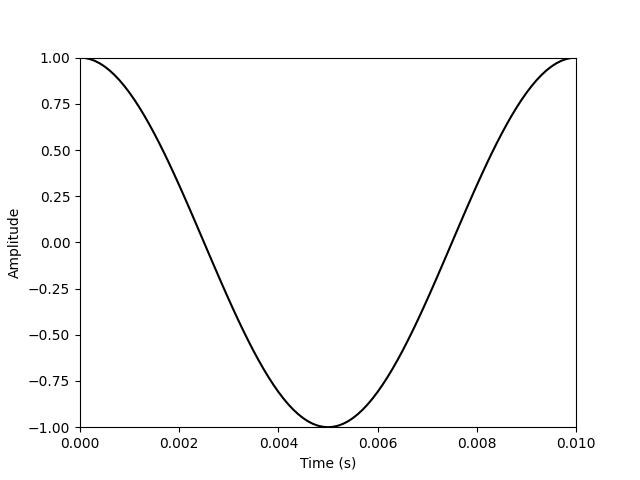

In [ ]:
# Setting up the plots
fig, axes = plt.subplots(figsize=(8,4))

dt = 0.00001 # time spacing
t = np.arange(0,2,dt) # range of times to plot on x-axis
line, = axes.plot([], [], 'k')
axes.set_ylabel('Amplitude', color='k')
axes.set_xlabel('Time (s)', color='k')
axes.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes.set_xlim([0, 0.01])
axes.set_ylim([-1, 1])

# Create the interactive plot
def update_sinusoid(A = 1, fo=100, theta = 0):
    
    y = A*np.cos(2*np.pi*fo*t + theta)

    line.set_data(t, y)
    fig.canvas.draw_idle()
    IPython.display.display(Audio(y.T, rate=1/dt,normalize=False))


print('Move the slider to see how the parameters change the cosine and listen to the result')
slider1 = widgets.FloatSlider(min=0.1, max=1, step=0.01, value=0.5, description='Amplitude:', layout=widgets.Layout(width='500'))
slider1.style.description_width = '120px'

slider2 = widgets.FloatSlider(min=100, max=1000, step=1, description='Frequency (Hz):', layout=widgets.Layout(width='500'))
slider2.style.description_width = '120px'

slider3 = widgets.FloatSlider(min=-4*np.pi, max=4*np.pi, step=np.pi/16, description='Phase Offset (rad):',layout=widgets.Layout(width='500'))
slider3.style.description_width = '120px'

widgets.interact(update_sinusoid, A=slider1, fo=slider2, theta=slider3)
plt.show()

### Some fun things

We can "modulate" the sinusoid by making the phase offset some function of time. In the following, I've made the phase offset a sinusoidal signal with some frequency $f_2$. Feel free to change the function to whatever you like, and see how the waveform changes, and what it sounds like!

Move the slider to see how the parameters change the cosine and listen to the result


interactive(children=(FloatSlider(value=1.0, description='A', max=1.0, min=0.1, step=0.01), IntSlider(value=1,…

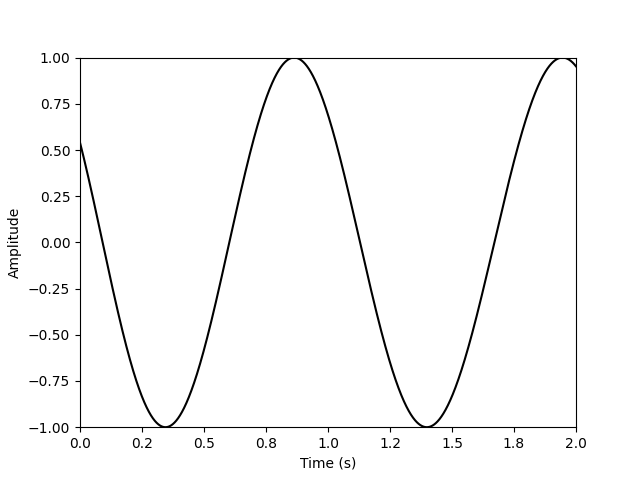

In [ ]:
# Setting up the plots - some wildness with phase
fig, axes = plt.subplots(figsize=(8,4))

dt = 0.00001 # time spacing
t = np.arange(0,2,dt) # range of times to plot on x-axis
line, = axes.plot([], [], 'k')
axes.set_ylabel('Amplitude', color='k')
axes.set_xlabel('Time (s)', color='k')
axes.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axes.set_xlim([0, 0.1])
axes.set_ylim([-1, 1])

# Create the interactive plot
def update_sinusoid(A = 1, fo=100, f2 = 0.1):
    
    theta = np.cos(2*np.pi*f2*t)
    y = A*np.cos(2*np.pi*fo*t + theta)

    line.set_data(t, y)
    fig.canvas.draw_idle()
    IPython.display.display(Audio(y.T, rate=1/dt,normalize=False))


print('Move the slider to see how the parameters change the cosine and listen to the result')
slider1 = widgets.FloatSlider(min=0.1, max=1, step=0.01, value=0.5, description='Amplitude:', layout=widgets.Layout(width='500'))
slider1.style.description_width = '120px'

slider2 = widgets.FloatSlider(min=100, max=1000, step=1, description='Frequency (Hz):', layout=widgets.Layout(width='500'))
slider2.style.description_width = '120px'

slider3 = widgets.FloatSlider(min=0.1, max=100, step=0.1, description='Mod. freq (Hz):',layout=widgets.Layout(width='500'))
slider3.style.description_width = '120px'

widgets.interact(update_sinusoid, A=slider1, fo=slider2, f2=slider3)
plt.show()
